### 多元随机变量 | Multivariate random variables

We now consider the problem of simulating a $D$-dimensional random vector:

$$
X_1, X_2, \cdots, X_D
$$
- $X_d$, $d = 1,...,D$ - Possibly dependent, and, can have different marginal distributions.

1. The simple case:
    - $X_1, X_2, \cdots, X_D$ - Mutually independent.
    > 相互独立

2. The general case:
    - $X_1, X_2, \cdots, X_D$ - dependent
    > 依赖

---

### 独立随机变量 | Independent Random Variables

Two random variables $X$ and $Y$ are independent if, $\forall \mathcal{A}, \mathcal{B}$

$$
\mathbb{P}(X\in\mathcal{A},Y\in\mathcal{B})=\mathbb{P}(X\in\mathcal{A})\mathbb{P}(Y\in\mathcal{B})
$$

- $f_X(x), f_Y(y)$ - Marginal PDFs of $X$ and $Y$ respectively.
- $f_{X,Y}(x, y)$ - Joint PDF of $(X, Y)$.

$X, Y$ are independent if, and only if, $\forall x, y$:

$$
f_{X,Y}(x,y)=f_X(x)f_Y(y)
$$

- $F_X(x), F_Y(y)$ - Marginal CDFs of $X$ and $Y$ respectively.
- $F_{X, Y}(x, y)$ - Joint CDF of $(X, Y)$

$X, Y$ are independent if, and only if, $\forall x, y$:

$$
F_{X,Y}(x,y)=F_X(x)F_Y(y)
$$


---

### 相互独立随机变量 | Mutually independent random variables

$D$ random variables $X_1, X_2, \cdots, X_D$ are mutually independent if, $\forall \mathcal{A}_1, \cdots, \mathcal{A}_D$

$$
\mathbb{P}(X_1\in\mathcal{A}_1,\ldots,X_D\in\mathcal{A}_D)=\mathbb{P}(X_1\in\mathcal{A}_1)\ldots\mathbb{P}(X_D\in\mathcal{A}_D)
$$

- $f_{X_d}(x_d)$ - Marginal PDF of $X_d$, $d = 1, ..., D$
- $f_{X_1, \cdots, X_D}(x_1, \cdots, x_D)$ - Joint PDF of $X_1, \cdots, X_D$.

$X_1, \cdots, X_D$ are mutually independent if, and only if, $\forall x_1, \cdots, x_D$:

$$
f_{X_1,\ldots,X_D}(x_1,\ldots,x_D)=f_{X_1}(x_1)\ldots f_{X_D}(x_D)
$$

> A similar result holds for the CDFs


---

### 模拟独立随机变量 | Simulate independent random variables

If the $D$ random variables $X_1, \cdots, X_D$ are mutually independent, then each random variable $X_d$ can be simulated independent according to its marginal distribution, using one of the previously introduced simulation algorithms (inversion method, acceptance-rejection method, etc.)
> 如果 $D$ 个随机变量 $X_1, \cdots, X_D$ 是相互独立的，那么每个随机变量 $X_d$ 可以根据其边缘分布独立地模拟，使用先前介绍的模拟算法

- The uniform distribution simulations underlying the generation of each simulation with distribution $X_d$ must come from the **same pseudorandom number generator**.
> 用于生成每个 $X_d$ 分布模拟的均匀分布模拟必须来自 **同一个伪随机数生成器**。

- This straightforward approach does not work if the random vairable $X_1, \cdots, X_D$ are dependent.
> 如果随机变量 $X_1, \cdots, X_D$ 是依赖的，这种直接方法就不适用。


---

### 相关随机变量 | Correlated random variables

The easiest example of simulation of dependent random variable is the case of two Gaussian variables with prescribed correlation $\rho$.

The correlation (Persion correlation, or linear correlation) between two random variables $X$ and $Y$ is defined by:

$$
\rho_{X,Y}=\frac{\mathbb{C}\mathrm{ov}(X,Y)}{\sigma_X\sigma_Y}
$$

- $\mathbb{C}\mathrm{ov}(X,Y)$ - Covariance between $X$ and $Y$
- $\sigma_X, \sigma_Y$ - Standard deviation of $X$ and $Y$


If two random variables are independent, then $\rho_{X,Y} = 0$.
> 如果两个随机变量是独立的，那么 $\rho_{X,Y} = 0$。

However, the converse is generally not true: Two uncorrelated random variables are not necessarily independent.
> 反之一般不成立：两个不相关（uncorrelated）的随机变量不一定独立。

Classical counterexample:
- $X$ - Standard Gaussian variable
- $Y = X^2$

$X$ and $Y$ are perfectly dependent.

However, $X$ and $Y$ are uncorrelated since $\mathbb{E}[XY]=\mathbb{E}[X^3]=0=\mathbb{E}[X]\mathbb{E}[Y]$

> $X$ 和 $Y$ 是完全依赖的，但是，$X$ 和 $Y$ 是不相关的。

- Uncorrelatedness is equivalent to independence ONLY in special case when $X$ and $Y$ follow a joint normal distribution.

- Correltaion is a good measure of dependence ONLY in the multivariate Gaussian case

> 不相关性 等价于独立性，仅当 $X$ 和 $Y$ 服从联合正态分布的特殊情况下成立。<br>
> 相关系数 仅在多元高斯情况下是依赖性的良好度量。

---

## 1. 相关高斯变量的模拟 | Simulation of Correlated Gaussian Variables

### 1.1 二元高斯变量 | Bivariate Gaussian Variables

- $X \sim \mathcal{N}(0, 1)$, $Y \sim \mathcal{N}(0, 1)$ - Independent Standard Gaussian Variables

$$
\color{yellow}
Z:=\rho X+\sqrt{1-\rho^2}Y
$$

- $Z$ - Also a standard Gaussian variable, with correlation $\rho$ between $X$ and $Z$

> Indeed, $Z$ is a Gaussian variable (as a linear combination of two independent Gaussian variables).

1. Mean of $Z$ - $\mathbb{E}[Z]=0$
2. Variance of $Z$ - $\mathbb{V}\mathrm{ar}[Z]=\rho^2\mathbb{V}\mathrm{ar}[X]+(1-\rho^2)\mathbb{V}\mathrm{ar}[Y]=1,$

- $Z \sim \mathcal{N}(0, 1)$

$Z$'s correlation with $X$:

$$
\rho_{X,Z}=\mathbb{E}[XZ]=\rho\mathbb{E}[X^2]+\sqrt{1-\rho^2}\mathbb{E}[X]\mathbb{E}[Y]=\rho
$$




---

### 1.2 多元高斯变量 | Multivariate Gaussian Variables

- $\mathcal{N}(\mu, \Sigma)$ - Multivariate Gaussian Distribution - 多元高斯分布
- $\mu \in \R^D$ - Location vector - 位置向量
- $\Sigma \in \R^{D \times D}$ - Covariance matrix - 协方差矩阵

$$
f(\mathbf{x})=\frac{1}{\sqrt{(2\pi)^D\det(\boldsymbol{\Sigma})}}\mathrm{exp}\left(-\frac{1}{2}(\mathbf{x}-\mu)^\top\boldsymbol{\Sigma}^{-1}(\mathbf{x}-\mu)\right)
$$

Using this new notation, the previous bivariate gaussian vecotr $[X, Z]^T$ has:
- Mean - $\mu=[0,0]^\top$
- Covariance - $\boldsymbol{\Sigma}=\begin{bmatrix}1&\rho\\\rho&1\end{bmatrix}$


---

### 1.3 模拟多元高斯变量 | Simulate Multivariate Gaussian Variables

If the covariance matrix can be decomposed as,

$$
\mathbf{\Sigma}=\mathbf{A}\mathbf{A}^\top
$$

Then if $\mathbf{N}\sim\mathcal{N}(\mathbf{0},\mathbf{I})$ is a standard multivariate Gaussian vector, then,

$$
\color{yellow}
\mathbf{X}=\mu+\mathbf{AN}\sim\mathcal{N}(\mu,\mathbf{\Sigma})
$$


---

### 1.4 模拟二元高斯变量 | Simulate Bivariate Gaussian Variables

Simulated Two correlated Gaussian variable:
> 模拟两个相关高斯变量：

$$
\begin{bmatrix}
X_1\\X_2\end{bmatrix}\sim\mathcal{N}\left(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}1&\rho\\\rho&1
\end{bmatrix}\right)
$$

from two independent standard Gaussian variables:

$$
\left.\begin{bmatrix}N_1\\N_2\end{bmatrix}\sim\mathcal{N}\left(\begin{bmatrix}0\\0\end{bmatrix},\begin{bmatrix}1&0\\0&1\end{bmatrix}\right.\right)
$$

The square root $\mathrm{A}$ of the covariance matrix:

$$
\boldsymbol{\Sigma}=\begin{bmatrix}1&\rho\\\rho&1\end{bmatrix}
$$

is given by:

$$
\mathbf{A}=\begin{bmatrix}1&0\\\rho&\sqrt{1-\rho^2}\end{bmatrix}
$$

> Indeed, one can verify that $\boldsymbol{\Sigma}=\mathbf{A}\mathbf{A}^\top$

Multiplying $\mathrm{A}$ by a vector of independent standard Gaussian variables yields:

$$
\mathbf{A}\begin{bmatrix}N_1\\N_2\end{bmatrix}=\begin{bmatrix}1&0\\\rho&\sqrt{1-\rho^2}\end{bmatrix}\begin{bmatrix}N_1\\N_2\end{bmatrix}=\begin{bmatrix}N_1\\\rho N_1+\sqrt{1-\rho^2}N_2\end{bmatrix}=\begin{bmatrix}X_1\\X_2\end{bmatrix}
$$

This verifies that multiplying $[N_1,N_2]^\top\sim\mathcal{N}(\mathbf{0,I})$ by the matrix $\mathrm{A}$ produces a bivariate Gaussian vector:

$$
\begin{bmatrix}X_1\\X_2\end{bmatrix}\sim\mathcal{N}\left(\mu=\begin{bmatrix}0\\0\end{bmatrix},\boldsymbol{\Sigma}=\begin{bmatrix}1&\rho\\\rho&1\end{bmatrix}\right)
$$
- $\boldsymbol{\Sigma}=\mathbf{A}\mathbf{A}^{\top}$


More generally, we can simulate a bivariate Gaussian vector with general mean $\mu$ and general covariance $\Sigma$.
> 更一般地，我们可以模拟具有一般均值 $\mu$ 和一般协方差 $\Sigma$ 的二元高斯向量。

A general matrix can be written as:

$$
\boldsymbol{\Sigma}=\begin{bmatrix}\sigma_X^2&\rho\sigma_X\sigma_Y\\\rho\sigma_X\sigma_Y&\sigma_Y^2\end{bmatrix}
$$

The square-root matrix $\mathrm{A}$ is given by:

$$
\begin{bmatrix}\sigma_X&0\\\rho\sigma_Y&\sigma_Y\sqrt{1-\rho^2}\end{bmatrix}
$$


- $[N_1,N_2]^\top\sim\mathcal{N}(\mathbf{0,I})$

$$
\begin{aligned}
\begin{bmatrix}
X_1\\X_2
\end{bmatrix}
& :=
\mu+\mathbf{A}
\begin{bmatrix}N_1\\N_2\end{bmatrix} \\
& = 
\begin{bmatrix}\mu_1\\\mu_2\end{bmatrix} + \begin{bmatrix}\sigma_1&0\\\rho\sigma_2&\sigma_2\sqrt{1-\rho^2}\end{bmatrix}
\begin{bmatrix}N_1\\N_2\end{bmatrix} \\
& = \begin{bmatrix}\mu_1+\sigma_1N_1\\\mu_2+\sigma_2(\rho N_1+\sqrt{1-\rho^2}N_2)\end{bmatrix}
\end{aligned}
$$

- $[X_1,X_2]^\top\sim\mathcal{N}(\mu,\boldsymbol{\Sigma})$ has the desired distribution.

In particular,

$$
\begin{aligned}&X_1\sim\mathcal{N}(\mu_1,\sigma_1^2)\\&X_2\sim\mathcal{N}(\mu_2,\sigma_2^2)\\&\mathbb{C}\mathrm{orr}(X_1,X_2)=\rho\end{aligned}
$$


---

### 1.5 模拟多元高斯变量 | Simluate Multivariate Gaussian Variables

- $\mathbf{N}=[N_1,N_2,\ldots,N_D]^\top\sim\mathcal{N}(\mathbf{0},\mathbf{I})$

These independent Gaussian variables can be simulated, for example, from the Box-Muller algorithm.
> 这些独立高斯变量可以通过例如 Box-Muller 算法来模拟。

In order to simulate $\mathbf{X}=[X_1,X_2,\ldots,X_D]^\top\sim\mathcal{N}(\mu,\boldsymbol{\Sigma})$, the only difficulty is to compute the square-root matrix $\mathrm{A}$ of $\boldsymbol{\Sigma}=\mathbf{A}\mathbf{A}^\top$.
> 为了模拟 $\mathbf{X}=[X_1,X_2,\ldots,X_D]^\top\sim\mathcal{N}(\mu,\boldsymbol{\Sigma})$，唯一的困难是计算 $\boldsymbol{\Sigma}=\mathbf{A}\mathbf{A}^\top$ 的平方根矩阵 $\mathrm{A}$。

This can be achieved using the $\color{yellow}\text{Cholesky Decomposition}$.
> 这可以通过 $\color{yellow}\text{Cholesky 分解}$ 来实现。

- Numerically stable, **数值稳定**
- Computational complexity, 计算复杂度 - $\mathcal{O}(D^3)$
- Twice faster than the LU decomposition - 比 LU 分解快两倍

Then, computing $\mathbf{X}=\mu+\mathbf{AN}$ provides simulations with the desired distribution $\mathbf{X}\sim\mathcal{N}(\mu,\boldsymbol{\Sigma})$
> 然后，计算 $\mathbf{X}=\mu+\mathbf{AN}$ 提供了具有所需分布 $\mathbf{X}\sim\mathcal{N}(\mu,\boldsymbol{\Sigma})$ 的模拟。


---

### 1.6 Bivariate Gaussian Simulation with Scipy

In [15]:
import numpy as np
from scipy.stats import norm

mu = np.array([
    [10],
    [30]
])
sigma1, sigma2, rho = 0.4, 0.3, 0.35
S = np.array([
    [sigma1 * sigma1, rho * sigma1 * sigma2],
    [rho * sigma1 * sigma2, sigma2 * sigma2]
])
A = np.linalg.cholesky(S)

print(np.allclose(A@A.T, S), "\n")

N = norm.rvs(size = [2, 1000])
X = mu + A @ N

print((np.mean(X[0,:]), np.std(X[0,:])), "\n")
print((np.mean(X[1,:]), np.std(X[1,:])), "\n")
print(np.corrcoef(X[0,:],X[1,:])[0,1])


True 

(np.float64(9.98429538587005), np.float64(0.38904493028190285)) 

(np.float64(30.00218451640293), np.float64(0.30143921688342157)) 

0.3452091912077253


In [16]:
from scipy.stats import multivariate_normal

mu = np.array([10, 30])
sigma1, sigma2, rho = 0.4, 0.3, 0.35
S = np.array([
    [sigma1 * sigma1, rho * sigma1 * sigma2],
    [rho * sigma1 * sigma2,   sigma2 * sigma2]
])
X = multivariate_normal.rvs(mean = mu, cov = S, size = 1000)

print(np.shape(X), "\n")
print(np.mean(X[:,0]) , np.std(X[:,0]), "\n")
print(np.mean(X[:,1]) , np.std(X[:,1]), "\n")
print(np.corrcoef(X[:,0],X[:,1])[0,1])

(1000, 2) 

9.98383951413799 0.4186589214921227 

29.996026286547945 0.2997771772030623 

0.4116836654070893


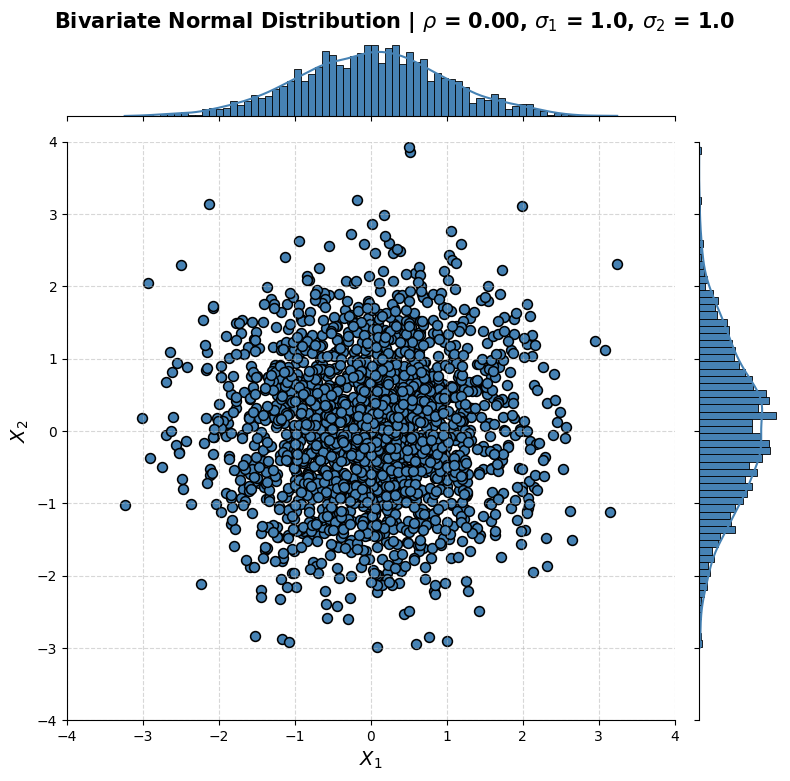

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_bivariate_normal_scatter_plot(
    mu = np.array([0, 0]), sigma1 = 1.0, sigma2 = 1.0, rho = 0.0, 
    n_samples = 2000, random_state = 42
) -> np.ndarray:
    """
    Create a joint distribution plot of a bivariate normal distribution
    
    Parameters:
    mu: Mean vector, default is [0, 0]
    sigma1, sigma2: Standard deviations
    rho: Correlation coefficient
    n_samples: Number of samples
    random_state: Random seed
    """    
    # Create covariance matrix
    cov_matrix = np.array([
        [sigma1 ** 2, rho * sigma1 * sigma2],
        [rho * sigma1 * sigma2, sigma2 ** 2]
    ])
    
    # Generate multivariate normal distribution samples
    X = multivariate_normal.rvs(
        mean = mu, cov = cov_matrix, 
        size = n_samples, random_state = random_state
    )
    
    # plt.figure(figsize = (8, 8))
    g = sns.jointplot(
        x = X[:, 0], y = X[:, 1], 
        kind = 'scatter',
        color = "steelblue", s = 200, marker = ".", alpha = 1, edgecolor = "black", 
        marginal_kws = dict(kde = True, fill = True, alpha = 1, color = 'steelblue', bins = 70),
        height = 8, ratio = 6
    )
    # g = sns.jointplot(    # 六边形密度分布图，视觉平滑
    #     x = X[:, 0], y = X[:, 1], 
    #     kind = 'hex', alpha = 1, gridsize = 50,
    #     marginal_kws = dict(bins = 30, fill = True),
    #     height = 8, ratio = 6
    # )
    g.ax_joint.set_xlim([-4, 4])
    g.ax_joint.set_ylim([-4, 4])
    # g.ax_joint.set_aspect('equal')    # 谨慎使用，有时对不齐。
    g.ax_joint.set_xlabel('$X_1$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.set_ylabel('$X_2$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.grid(True, linestyle = '--', alpha = 0.5)
    title = (f'Bivariate Normal Distribution | $\\rho$ = {rho:.2f}, $\\sigma_1$ = {sigma1}, $\\sigma_2$ = {sigma2}')
    plt.suptitle(title, fontsize=15, fontweight='bold', y=0.97)
    plt.tight_layout()
    # plt.savefig("./bivariate_normal_distribution_scatter.svg", format="svg", bbox_inches="tight")
    plt.show()
    
    return X

mu, sigma1, sigma2, rho, n_samples = np.array([0, 0]), 1.0, 1.0, 0.0, 2_000
samples = create_bivariate_normal_scatter_plot(mu = mu, sigma1 = sigma1, sigma2 = sigma2, rho = rho, n_samples = n_samples)

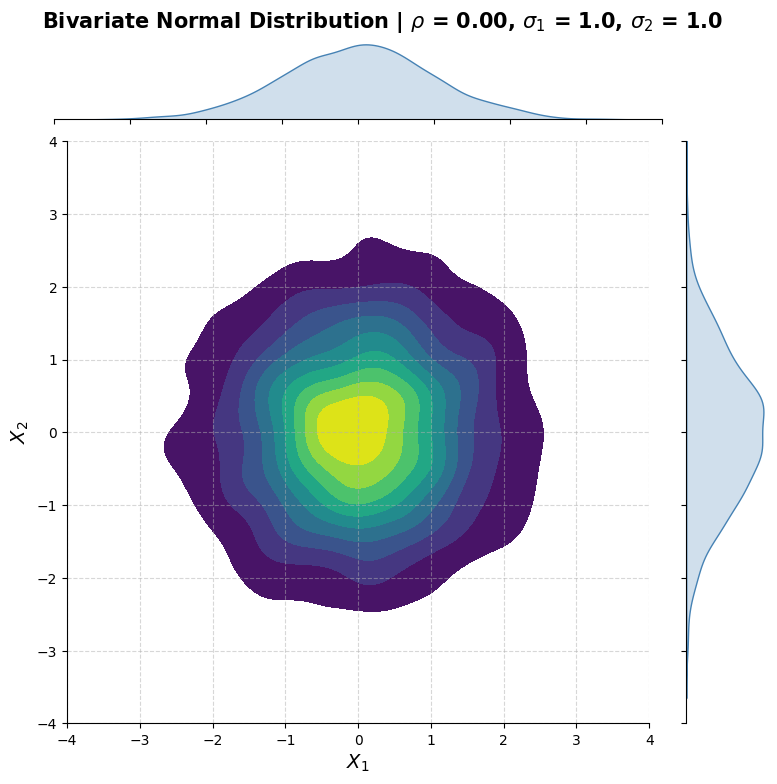

In [18]:
import warnings
warnings.filterwarnings("ignore")

def create_bivariate_normal_contour_plot(
    mu: np.ndarray = np.array([0, 0]), 
    sigma1: float = 1.0, 
    sigma2: float = 1.0, 
    rho: float = 0.0, 
    n_samples: int = 2000,
    random_state: int = 42
) -> np.ndarray:
    """
    Create a joint distribution plot of a bivariate normal distribution
    
    Parameters:
    mu: Mean vector, default is [0, 0]
    sigma1, sigma2: Standard deviations
    rho: Correlation coefficient
    n_samples: Number of samples
    """
    cov_matrix = np.array([
        [sigma1 ** 2, rho * sigma1 * sigma2],
        [rho * sigma1 * sigma2, sigma2 ** 2]
    ])
    X = multivariate_normal.rvs(mean = mu, cov = cov_matrix, size = n_samples, random_state = random_state)
    
    g = sns.JointGrid(x = X[:, 0], y = X[:, 1], height = 8, ratio = 6)
    sns.kdeplot(
        x = X[:, 0], y = X[:, 1], 
        cmap = "viridis", shade = True, shade_lowest = False, 
        ax = g.ax_joint,
    )
    sns.kdeplot(x = X[:, 0], fill = True, alpha = 0.25, ax = g.ax_marg_x, color = 'steelblue')
    sns.kdeplot(y = X[:, 1], fill = True, alpha = 0.25, ax = g.ax_marg_y, color = 'steelblue')
    g.ax_joint.set_xlim([-4.0, 4.0])
    g.ax_joint.set_ylim([-4.0, 4.0])
    g.ax_joint.set_aspect('equal')
    g.ax_joint.set_xlabel('$X_1$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.set_ylabel('$X_2$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.grid(True, linestyle = '--', alpha = 0.5)
    title = f'Bivariate Normal Distribution | $\\rho$ = {rho:.2f}, $\\sigma_1$ = {sigma1}, $\\sigma_2$ = {sigma2}'
    plt.suptitle(title, fontsize = 15, fontweight = 'bold', y = 0.97)
    plt.tight_layout()
    # plt.savefig("./bivariate_normal_distribution_contour.svg", format="svg", bbox_inches="tight")
    plt.show()
    
    return X

# Example usage
mu, sigma1, sigma2, rho, n_samples = np.array([0, 0]), 1.0, 1.0, 0.0, 2_000
samples = create_bivariate_normal_contour_plot(mu = mu, sigma1 = sigma1, sigma2 = sigma2, rho = rho, n_samples = n_samples)

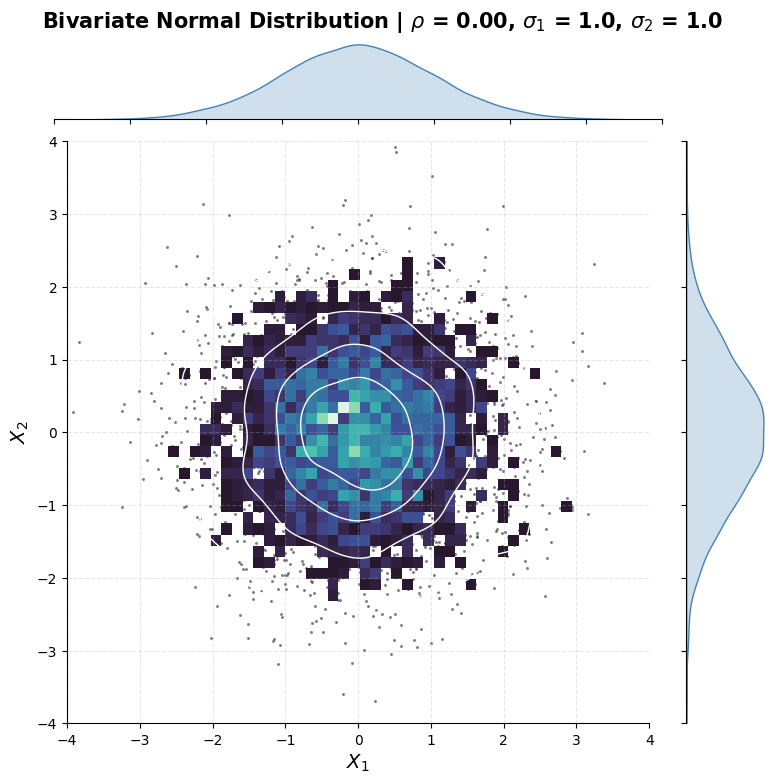

In [19]:
def create_bivariate_normal_combined_plot(
    mu: np.ndarray = np.array([0, 0]), 
    sigma1: float = 1.0, 
    sigma2: float = 1.0, 
    rho: float = 0.0, 
    n_samples: int = 2_000,
    random_state: int = 42
) -> np.ndarray:
    """
    Create a combined scatter, histogram and contour plot of bivariate normal distribution
    
    Parameters:
    mu: Mean vector, default is [0, 0]
    sigma1, sigma2: Standard deviations
    rho: Correlation coefficient
    n_samples: Number of samples
    random_state: Random seed
    """
    cov_matrix = np.array([
        [sigma1 ** 2, rho * sigma1 * sigma2],
        [rho * sigma1 * sigma2, sigma2 ** 2]
    ])
    X = multivariate_normal.rvs(
        mean = mu, cov = cov_matrix, 
        size = n_samples, random_state = random_state
    )
    
    g = sns.JointGrid(x = X[:, 0], y = X[:, 1], height = 8, ratio = 6)
    # Main joint plot: scatter + 2D histogram + contour lines
    sns.scatterplot(x = X[:, 0], y = X[:, 1], s = 5, color = ".15", alpha = 0.6, ax = g.ax_joint)
    sns.histplot(x = X[:, 0], y = X[:, 1], bins = 50, pthresh = 0.1, cmap = "mako", ax = g.ax_joint)
    sns.kdeplot(x = X[:, 0], y = X[:, 1], levels = 5, color = "white", linewidths = 1, ax = g.ax_joint)
    # Marginal distributions with KDE and filling
    sns.kdeplot(x = X[:, 0], fill = True, alpha = 0.25, color = "steelblue", ax = g.ax_marg_x)
    sns.kdeplot(y = X[:, 1], fill = True, alpha = 0.25, color = "steelblue", ax = g.ax_marg_y)
    g.ax_joint.set_xlim([-4.0, 4.0])
    g.ax_joint.set_ylim([-4.0, 4.0])
    g.ax_joint.set_aspect('equal')
    g.ax_joint.set_xlabel('$X_1$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.set_ylabel('$X_2$', fontsize = 14, fontweight = 'bold')
    g.ax_joint.grid(True, linestyle = '--', alpha = 0.3)
    title = f'Bivariate Normal Distribution | $\\rho$ = {rho:.2f}, $\\sigma_1$ = {sigma1}, $\\sigma_2$ = {sigma2}'
    plt.suptitle(title, fontsize = 15, fontweight = 'bold', y = 0.97)
    plt.tight_layout()
    # plt.savefig("./bivariate_normal_distribution_combined.svg", format="svg", bbox_inches="tight")
    plt.show()
    
    return X

mu, sigma1, sigma2, rho, n_samples = np.array([0, 0]), 1.0, 1.0, 0.0, 5_000
samples = create_bivariate_normal_combined_plot(mu = mu, sigma1 = sigma1, sigma2 = sigma2, rho = rho, n_samples = n_samples)


---

#### 评论 | Comments

1. A scatter plot is a good starting point to visualize bivariate data.

2. If the dataset is very large, a 2D histogram might be preferable.

3. A contour plot makes it possible to visualize the level sets of the bivariate density.
    - It first requires an estimation of the density from the dataset.
    - This is achieved by kernel density estimation (KDE)

4. The last few plots combine a scatterplot, a histogram and a contour plot on the same figure, along with the marginal distributions (also estimated by kernel density estimation).

---

### 1.7 二元高斯分布 | Bivariate Gaussian Distribution

1. The level sets of the bivariate Gaussian distribution are ellipses.
    - In the independent case $\rho = 0$, they become circles.
    > 二元高斯分布的水平集是椭圆。<br>
    > 在独立情况 $\rho = 0$ 下，它们变成圆。

2. As the absolute value of $\rho$ increases, these ellipses are squeezed towards the line defined by:
> 随着 $\rho$ 的绝对值增加，这些椭圆被挤压朝向由以下定义的直线：

$$
x_2=\mathrm{sign}(\rho)\frac{\sigma_2}{\sigma_1}(x_1-\mu_1)+\mu_2
$$

Replacing $\mathrm{sign}(\rho)$ by $\rho$ gives the conditional expectation of $X_2$ conditioned on $X_1 = x_1$, which correpsondings to the best linear unbiased prediction of $X_2$ given a value of $X_1$.
> 将 $\mathrm{sign}(\rho)$ 替换为 $\rho$ 给出 $X_2$ 在 $X_1 = x_1$ 条件下的条件期望，这对应于给定 $X_1$ 值时 $X_2$ 的最佳线性无偏预测（best linear unbiased prediction）。


---

### 1.8 病态协方差矩阵 | Ill-Conditioned Covariance Matrix

When estimating a high-dimensional covariance matrix on financial data, it is very likely that the matrix will be ill-conditioned due to virtual multicollinearity.
> 当在金融数据上估计高维协方差矩阵时，由于虚拟多重共线性（virtual multicollinearity），矩阵很可能是病态的（ill-conditioned）。

Condition number of a matrix, e.g., a positive-definite, symmetric square matrix , s.a., a covariance matrix $\Sigma$:

$$
\text{cond} = \frac{\lambda_1(\Sigma)}{\lambda_D(\Sigma)} 
$$
- $\lambda_1(\Sigma)$ - Largest eigenvalue
- $\lambda_D(\Sigma)$ - Smallest eigenvalue

Numerical algorithms such as the Cholesky decomposition might struggle to return reliable results if the covariance matrix is very ill-conditioned.
> 如果协方差矩阵非常病态，数值算法如 Cholesky 分解可能难以返回可靠的结果。

---

### 1.9 协方差矩阵正则化 | Covariance Matrix Regularization

A common approach is to regularize the matrix, which means replacing it by a very close yet much better conditioned matrix.
> 将其替换为一个非常接近但条件数更好的矩阵。

The simplest regularization technique is to replace $\Sigma$ by:

$$
\boldsymbol{\Sigma}_\varepsilon:=\frac{1}{1+\varepsilon}(\boldsymbol{\Sigma}+\varepsilon\mathbf{I})
$$

This leaves the eigenvectors of $\Sigma$ unchanged but replaces the eigenvalues $\lambda_d(\boldsymbol{\Sigma})$, $d = 1, ..., D$ of $\Sigma$ by:

$$
\lambda_d(\boldsymbol{\Sigma}_\varepsilon)=\frac{\lambda_d(\boldsymbol{\Sigma})+\varepsilon}{1+\varepsilon}
$$

The new condition number is:

$$
\mathrm{cond}(\boldsymbol{\Sigma}_{\varepsilon})=\frac{\lambda_{1}(\boldsymbol{\Sigma})+\varepsilon}{\lambda_{D}(\boldsymbol{\Sigma})+\varepsilon}\ll\frac{\lambda_{1}(\boldsymbol{\Sigma})}{\lambda_{D}(\boldsymbol{\Sigma})}=\mathrm{cond}(\boldsymbol{\Sigma})
$$

Indeed, one can show that:

$$
\mathrm{cond}(\boldsymbol{\Sigma}_\varepsilon)=1+\frac{\lambda_D(\boldsymbol{\Sigma})}{\lambda_D(\boldsymbol{\Sigma})+\varepsilon}(\mathrm{cond}(\boldsymbol{\Sigma})-1)
$$
- $\mathrm{cond}(\boldsymbol{\Sigma})\geq1$
- $\frac{\lambda_D(\boldsymbol{\Sigma})}{\lambda_D(\boldsymbol{\Sigma})+\varepsilon}<1$

This is an example of Shrinkage Estimator.
> 收缩估计量


---

## 2. 相关非高斯变量的模拟 | Simulation of Correlated Non-Gaussian Variables

### 2.1 Iman-Conover 方法 | The Iman-Conover Method

Unlike the Gaussian case, there is no simple way to simulate a multivariate random vector with prescribed covariance matrix in the non-Gaussian case.
> 在非高斯情况下，没有简单的方法来模拟具有指定协方差矩阵的多元随机向量。

We are going to describe the most common method, known as the Iman-Conover method, to attempt to solve this problem.


---

### 相关性的局限性 | Limitations of Correlations

1. In the Gaussian case, the $\color{yellow}\text{dependence structure}$ of a random vector is fully determined by its covariance matrix. 
> 在高斯情况下，随机向量的 $\color{yellow}\text{依赖结构}$ 完全由其协方差矩阵决定。
2. In the non-Gaussian case, this is not the case anymore, 在非高斯情况下，情况不再如此：:
    - Uncorrelated variables are not necessarily independent
    > 不相关的变量不一定是独立的
    - The same marginal distributions and covariances can be achieved by infinitely many different joint distributions.
    > 相同的 边缘分布 和 协方差 可以通过无限多个不同的 联合分布 来实现。

As a result, the intuition we get about the meaning of correlation in the Gaussian context does not apply to non-Gaussian variables. 
> 在高斯背景下获得的关于相关性含义的直觉，并不适用于非高斯变量。

In other words, correlations are not a great way of defining or measuring the dependence structure between (non-Gaussian) variables
> 相关性不是定义或衡量（非高斯）变量之间依赖结构的理想方式。

More suitable tools are needed, such as $\color{yellow}\text{copulas, 连接函数}$.
> 


---

### 额外信息

背景：
- 在金融等领域，许多变量（如资产收益率、风险因子）的分布并非完美的高斯分布（正态分布），它们可能具有尖峰、厚尾等特征。
- 我们需要模拟这些具有特定相关性和给定边缘分布的非高斯变量。

挑战：
- 对于多元高斯分布，整个依赖结构完全由协方差矩阵决定，并且有 Cholesky 分解这样的标准方法进行模拟。
- 但对于非高斯分布，协方差矩阵不足以唯一确定联合分布。
- 这意味着，即使两个多元非高斯模型具有完全相同的边缘分布和协方差矩阵，它们的联合分布（即变量如何共同变化的模式）也可能完全不同。

相关性 ≠ 依赖性
- 相关性 特指 线性相关性，由皮尔逊相关系数 $\rho$ 衡量。
- 依赖性 是一个更广泛的概念，包括非线性关系（例如，一个变量是另一个变量的平方）。
- 关键：
    - 两个变量可以不相关，但仍然高度依赖
    - 在高斯分布中，不相关 = 独立

---

## 3. Copulas

定义：
- Copula 是一种函数，它能将多个边缘分布“连接”起来，形成一个联合分布。

> Sklar 定理 指出，任何多元联合分布都可以分解为它的多个边缘分布和一个 Copula 函数，该 Copula 函数完全描述了变量间的依赖结构。

优势：
- 分离性：
    - 将变量的边缘分布和变量间的依赖结构分离开来，允许我们独立地建模。
- 更丰富的依赖度量：
    - Copula 能够捕捉非线性、非对称的依赖关系，特别是在分布尾部的依赖行为（如金融危机中资产同时暴跌的现象），这是简单的线性相关无法做到的。
- 灵活性：
    - 可以选择不同的 Copula 函数（如高斯 Copula, t-Copula）来描述各种复杂的依赖模式。


---

### 3.1 Bivariate copula

- $X, Y$ - Two random variables
- $F_X(x)=\mathbb{P}(X{\leqslant}x), F_Y(y)=\mathbb{P}(Y{\leq}y)$ - Marginal CDFs
- $F_{X,Y}(x,y)=\mathbb{P}(X{\leq}x,Y{\leq}y)$ - Joint CDF

According to Sklar's theorem, $\exists$ copula function $\mathcal{C}=\mathcal{C}(u,v)$, s.t., the joint CDF $F_{X,Y}$ can be decomposed as follows:

$$
\color{yellow}
F_{X,Y}(x,y)=\mathcal{C}(F_X(x),F_Y(y))
$$

By definition, a copula is a multivariate cumulative distribution function for which the marginal probability distribution of each variable is uniform on the interval `[0, 1]`


---

### 3.2 Multivariate copula

The same decomposition of joint CDFs holds in higher dimension.


---

### 3.3 Dependence modelling using copulas

Sklar's theorem tells us that a multivariate distribution can be decomposed into two parts:
1. the modelling of the marginal distributions, determined by the univariate cumulative distribution functions $F_{X_d}$, $d = 1, 2, ..., D$
2. the modelling of the $\color{yellow}\text{dependence structure}$, determined by the copula $\mathcal{C}$

This separation between marginal distributions and the dependence structure is what makes copulas very suitable for dependence modelling. 

By contrast, alternative measures of dependence such as Pearson's correlation are affected by both the dependence structure AND the marginal distributions (which is the reason why the simulation of non-Gaussian random variables with prescribed correlation coefficient is hard and sometimes impossible).


---

### 3.4 Independence copula

For simplicity we focus on bivariate copulas. 

The simplest example of copula is the so-called $\color{yellow}\text{independence copula}$ , defined by:

$$
\mathcal{C}(u,v)=u\times v
$$

This is the copula of random variables which are independent of each other.

$$
F_{X,Y}(x,y)=\mathcal{C}(F_X(x),F_Y(y))=F_X(x)\times F_Y(y)
$$
- $\forall x, y$


---

### 3.5 Copula bounds

The Fréchet-Hoeffding theorem states that the following bounds hold for any copula $\mathcal{C}$:

$$
\max(u+v-1,0)\leq\mathcal{C}(u,v)\leq\min(u,v)
$$

1. The upper bound $M(u,v):=\min(u,v)$ is a copula which corresponds to $\color{yellow}\text{comonotonic random variables}$.
    - Perfect **positive** dependence, meaning that $(X,Y)=(F_X^{-1}(\mathbf{U}),F_Y^{-1}(\mathbf{U}))$ using the same uniform random variable $\mathbf{U}$
2. The lower bound $W(u,v):=\max(u+v-1,0)$ is a copula which corresponds to $\color{yellow}\text{countermonotonic random variables}$ 
    - Perfect **negative** dependence, meaning that $(X,Y)=(F_X^{-1}(\mathbf{U}),F_Y^{-1}(\mathbf{1}-\mathbf{U}))$ using the same uniform random variable $\mathbf{U}$


---

### 3.6 Archimedean Copula

A copula $\mathcal{C}$ is called $\color{yellow}\text{Archimedean}$ if it admits the representation:

$$
\mathcal{C}(u,v)=\phi^{-1}(\phi(u)+\phi(v))
$$
- Generator $\phi$ - Continuous, decreasing and convex function, s.t., $\phi(1)=0$

The simplest example of Archimedean copula is the independence copula $\mathcal{C}(u,v)=u\times v$, obtained by choosing the generator $\phi(u)=-\log(u)$


---

### 3.7 克莱顿连接函数 | Clayton Copula

Another example of Archimedean copula is the $\color{yellow}\text{Clayton copula}$, obtained by choosing the generator:

$$
\phi_\theta(u)=\frac{1}{\theta}(u^{-\theta}-1)
$$

It is given by:

$$
\mathcal{C}_\theta(u,v)=\max\left[\left(u^{-\theta}+v^{-\theta}-1\right)^{-\frac{1}{\theta}},0\right]
$$
- $\theta\in[-1,\infty)\backslash\{0\}$ - Controls the strength of the $\color{yellow}\text{lower tail dependence}$.

This class of copulas contain the following three important particular cases:
1. $\theta=-1$ - the lower Fréchet bound
$$
\mathcal{C}_\theta(u,v)=\max(u+v-1,0)
$$

2. $\theta \to 0$ - the independence copula, 趋于独立性
$$
\mathcal{C}_\theta(u,v)=uv
$$

3. $\theta \to \infin$ - the upper Fréchet bound, 趋于完全依赖性
$$
\mathcal{C}_\theta(u,v)=\min(u,v)
$$


---

### 3.8 Simulation from a Copula

A general method to simulate draws from a chosen copula $\mathcal{C}$ is known as $\color{yellow}\text{conditional sampling}$.

Let $U$ and $V$ be two standard uniform random variables.

Consider the conditional distribution:
$$
c_u(v)=\mathbb{P}(V\leq v|U=u)
$$
- $c_u$ - CDF of $V$ conditionally on the event $U = u$, $u\in[0, 1]$

$$
c_u(v)=\frac{\partial C}{\partial u}(u,v)
$$

Simulate two uniform random variables with prescribed copula by the $\color{yellow}\text{inversion method}$:

1. Generate two independent uniform random variable simulations $(u_1,u_2)\in[0,1]^2$
2. Set $u=u_1$ and $v=c_{u_1}^{-1}(u_2)$


---

### 3.9 Simulation from the Clayton Copula

$$
\begin{aligned}
& \mathcal{C}_\theta(u,v) = \left(u^{-\theta} + v^{-\theta} - 1\right)^{-1/\theta} \\
& c_{\theta,u}(v) := \frac{\partial\mathcal{C}_\theta}{\partial u}(u,v) = u^{-\theta-1}\left(u^{-\theta} + v^{-\theta} - 1\right)^{-\frac{1}{\theta}-1} \\
& c_{\theta,u}^{-1}(v) = \left(1 + u^{-\theta}\left(v^{-\frac{\theta}{1 + \theta}}-1\right)\right)^{-\frac{1}{\theta}}
\end{aligned}
$$

1. Generate two independent uniform random variable simulations $(u_1,u_2)\in[0,1]^2$ 
2. Set $u = u_1$ and $v=\left(1+u_1^{-\theta}\left(u_2^{-\frac{\theta}{1+\theta}}-1\right)\right)^{-\frac{1}{\theta}}$


---

### 具有下尾相依性的时间序列 | Time series with lower tail dependence

As an example of application in finance, we simulate two time series with returns following a $t$ distribution, and with dependence defined by a Clayton copula.

- $S_1=(S_{1,n})_{n=0,1,\ldots,N}$, $S_2=(S_{2,n})_{n=0,1,\ldots,N}$ - Two time series.

On each time period, the rates of return $R_{1, n}$, $R_{2, n}$:

$$
R_{1,n}=\frac{S_{1,n+1}-S_{1,n}}{S_{1,n}}\quad R_{2,n}=\frac{S_{2,n+1}-S_{2,n}}{S_{2,n}}
$$

Using these returns, the values of the time series can be expressed as:
$$
\begin{aligned}
S_{1,n} & =S_{1,0}\times(1+R_{1,0})\times\cdots\times(1+R_{1,n-1}) \\
S_{2,n} & =S_{2,0}\times(1+R_{2,0})\times\cdots\times(1+R_{2,n-1})
\end{aligned}
$$

Assume that the returns $R_{1,n}, R_{2, n}$ are $t$ distributed with dependence defined by a Clayton copula.

The time series $S_1, S_2$ can be simulated as follows:

1. Simulate $2N$ **independent** uniform random variables $U_n$, $V_n$, $n = 1, 2, ..., N$

2. Use **conditional sampling** to introduce dependence between the two uniform series according to the Clayton copula with parameter $\theta$.
$$
\begin{aligned}
U_{1,n} & :=U_n \\
U_{2,n}& =\left(1+U_n^{-\theta}\left(V_n^{-\frac{\theta}{1+\theta}}-1\right)\right)^{-\frac{1}{\theta}}
\end{aligned}
$$

3. Use the inversion method with the Student $t$ CDF $F_v$ to obtain the returns $R_1, R_2$:
$$
\begin{aligned}
R_{1,n} & :=F_\nu^{-1}(U_{1,n}) \\
R_{2,n} & :=F_\nu^{-1}(U_{2,n})
\end{aligned}
$$

4. Use these returns to compute the simulation of the time series $S_1, S_2$ starting from the initial values $S_{1, 0}, S_{2, 0}$:
$$
\begin{aligned}
S_{1,n} & =S_{1,0}\times(1+R_{1,0})\times\cdots\times(1+R_{1,n-1}) \\
S_{2,n} & =S_{2,0}\times(1+R_{2,0})\times\cdots\times(1+R_{2,n-1})
\end{aligned}
$$


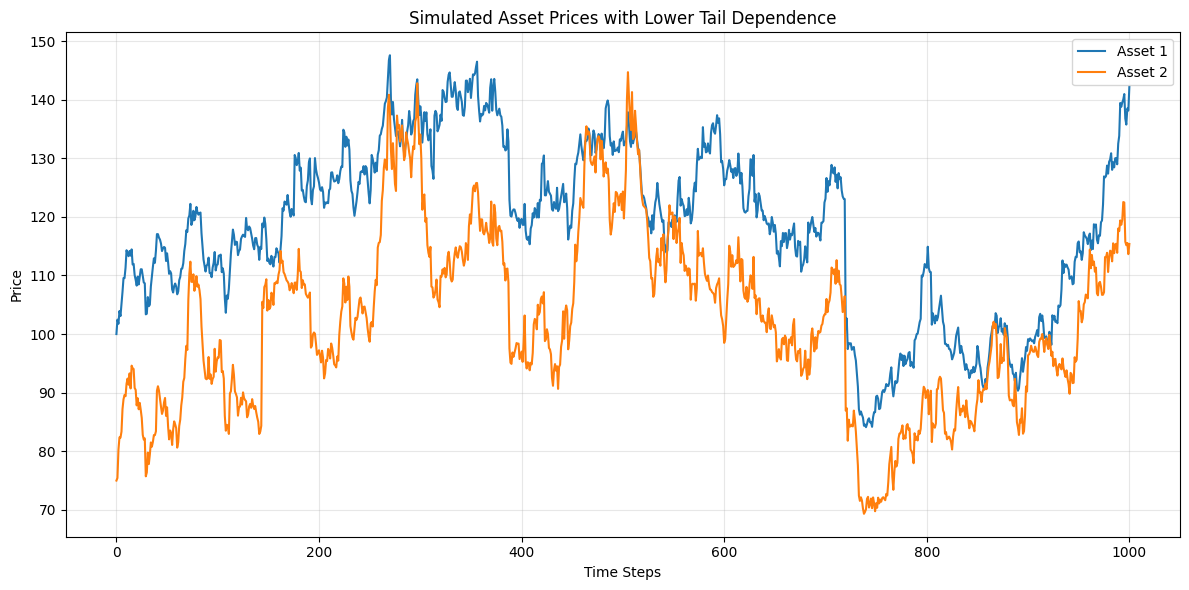

Simulation Summary:
Final Price - Asset 1: 142.20
Final Price - Asset 2: 115.37
Correlation between returns: 0.692


In [26]:
from scipy.stats import uniform, t

def simulate_correlated_assets(
    num_simulations = 1_000, initial_prices = (100, 75), 
    volatilities = (0.2, 0.3), theta = 2.5, degrees_freedom = 4
) -> tuple:
    """
    Simulate two asset price time series with lower tail dependence using Clayton copula.
    
    Parameters:
    -----------
    num_simulations : int
        Number of time steps to simulate
    initial_prices : tuple
        Initial prices for the two assets (S1_0, S2_0)
    volatilities : tuple
        Annual volatilities for the two assets
    theta : float
        Clayton copula parameter controlling tail dependence, 控制尾部依赖性强度
    degrees_freedom : int
        Degrees of freedom for Student's t-distribution, 控制分布的厚尾程度
    
    Returns:
    --------
    tuple : (time_index, S1_prices, S2_prices)
    """
    # Generate independent uniform random variables
    U = uniform.rvs(size = num_simulations)
    V = uniform.rvs(size = num_simulations)
    
    # Apply Clayton copula to create dependence
    U1 = U
    U2 = (1 + U ** (-theta) * (V ** (-theta / (1 + theta)) - 1)) ** (-1 / theta)
    
    # Convert to t-distributed returns with daily volatility scaling
    scale_factors = [vol / np.sqrt(255) for vol in volatilities]
    returns1 = t.ppf(U1, df = degrees_freedom, loc = 0.0, scale = scale_factors[0])
    returns2 = t.ppf(U2, df = degrees_freedom, loc = 0.0, scale = scale_factors[1])
    
    # Calculate price paths using cumulative product
    price_paths = np.zeros((num_simulations + 1, 2))
    price_paths[0] = initial_prices
    
    for i in range(num_simulations):
        price_paths[i + 1] = price_paths[i] * (1 + np.array([returns1[i], returns2[i]]))
    
    time_index = np.arange(num_simulations + 1)
    return time_index, price_paths[:, 0], price_paths[:, 1]


def plot_price_paths(time_index, prices1, prices2):
    """Plot the simulated price paths."""
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x = time_index, y = prices1, ax = ax, label = 'Asset 1', linewidth = 1.5)
    sns.lineplot(x = time_index, y = prices2, ax = ax, label = 'Asset 2', linewidth = 1.5)
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Price')
    ax.set_title("Simulated Asset Prices with Lower Tail Dependence")
    ax.legend()
    ax.grid(True, alpha = 0.3)
    plt.tight_layout()
    plt.show()

def main():
    NUM_SIMULATIONS = 1000
    INITIAL_PRICES = (100, 75)
    VOLATILITIES = (0.2, 0.3)  # 20% and 30% annual volatility
    CLAYTON_THETA = 2.5
    DF = 4  # Degrees of freedom for t-distribution
    
    time_idx, asset1_prices, asset2_prices = simulate_correlated_assets(
        num_simulations = NUM_SIMULATIONS,
        initial_prices = INITIAL_PRICES, 
        volatilities = VOLATILITIES,
        theta = CLAYTON_THETA,
        degrees_freedom = DF
    )
    
    plot_price_paths(time_idx, asset1_prices, asset2_prices)
    
    print(f"Simulation Summary:")
    print(f"Final Price - Asset 1: {asset1_prices[-1]:.2f}")
    print(f"Final Price - Asset 2: {asset2_prices[-1]:.2f}")
    print(f"Correlation between returns: {np.corrcoef(asset1_prices[1:]/asset1_prices[:-1]-1, asset2_prices[1:]/asset2_prices[:-1]-1)[0,1]:.3f}")
    
main()

---

1. `NUM_SIMULATIONS`
- 模拟时间长度
- 影响：
    - 较小值（如 `252` ）：模拟短期市场行为，波动更明显
    - 较大值（如 `5000` ）：模拟长期趋势，更能体现统计规律

2. `VOLATILITIES`
- 波动率参数
- 影响：
    - 低波动率 `(0.1, 0.1)` ：价格路径相对平滑，类似债券或防御性股票
    - 高波动率 `(0.5, 0.8)` ：价格剧烈波动，类似小盘股或加密货币
    - 不同波动率组合 ：模拟不同风险特征的资产组合

3. `CLAYTON_THETA`
- 尾部依赖性强度
- 影响：
    - $\theta \approx 0.1$ ：接近独立性，资产间几乎没有尾部依赖
    - $\theta = 1.0 - 3.0$ ：中等尾部依赖，类似大多数股票相关性
    - $\theta = 5.0 - 10.0$ ：强尾部依赖，模拟金融危机时的相关性剧增

4. `DF`
- t-分布自由度
- 影响：
    - `df = 3` ：极端厚尾，频繁出现极端收益率（类似新兴市场）
    - `df = 10` ：中等厚尾，比正态分布更真实的金融特征
    - `df = 30` ：接近正态分布，尾部风险较小
    - `df = 100` ：基本等同于正态分布

---

经典参数组合：

1. 平稳市场中的大盘股
```py
NUM_SIMULATIONS = 252 * 3  # 3年
VOLATILITIES = (0.15, 0.18)  # 中等波动
CLAYTON_THETA = 1.5  # 轻度尾部依赖
DF = 10  # 适度厚尾
```

2. 金融危机模拟
```py
NUM_SIMULATIONS = 500
VOLATILITIES = (0.4, 0.6)  # 高波动
CLAYTON_THETA = 8.0  # 强尾部依赖
DF = 3  # 极端厚尾
```

3. 债券与股票组合
```py
NUM_SIMULATIONS = 1000
VOLATILITIES = (0.08, 0.25)  # 低波动 + 高波动
CLAYTON_THETA = 0.5  # 弱尾部依赖
DF = 15  # 接近正态
```


---

#### 额外信息

1. 尾部依赖性的重要性
- 风险管理: 下尾依赖性意味着在市场下跌时，资产同时下跌的概率更高
- 投资组合优化: 需要考虑极端情况下的相关性变化
- 风险度量: VaR和ES等风险指标会受到影响

2. Clayton Copula的优势
- 专门捕捉下尾依赖: 比其他Copula更适合模拟金融危机时的相关性结构
- 参数解释明确: $\theta$ 参数直接控制尾部依赖性强度
- 计算相对简单: 条件抽样方法实现方便

---